<a href="https://colab.research.google.com/github/Abhay182005dat/Ai_Lab/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
df = pd.read_csv('Social_Network_Ads.csv')

In [68]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [69]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [70]:
df.shape

(400, 5)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [72]:
"""
min age is 18
25 % are below respective values and like that ..
"""
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [73]:
df['Gender'].value_counts()

,count
Gender,
Female,204
Male,196


In [74]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [75]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [76]:
df = pd.get_dummies(df, columns=['Gender'])
df

,User ID,Age,EstimatedSalary,Purchased,Gender_0,Gender_1
0,15624510,19,19000,0,True,False
1,15810944,35,20000,0,True,False
2,15668575,26,43000,0,False,True
3,15603246,27,57000,0,False,True
4,15804002,19,76000,0,True,False
...,...,...,...,...,...,...
395,15691863,46,41000,1,False,True
396,15706071,51,23000,1,True,False
397,15654296,50,20000,1,False,True
398,15755018,36,33000,0,True,False


In [77]:
df = df.rename(columns = {'Gender_0' : 'Male' , 'Gender_1': 'Female'})

In [78]:
df.corr()  # we can see age with purchased has almost near to 1 also the stimatedSalary not much but

,User ID,Age,EstimatedSalary,Purchased,Male,Female
User ID,1.000000,-0.000721,0.071097,0.007120,-0.025249,0.025249
Age,-0.000721,1.000000,0.155238,0.622454,-0.073741,0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,-0.060435,0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,-0.042469,0.042469
Male,-0.025249,-0.073741,-0.060435,-0.042469,1.000000,-1.000000
Female,0.025249,0.073741,0.060435,0.042469,-1.000000,1.000000


<Axes: >

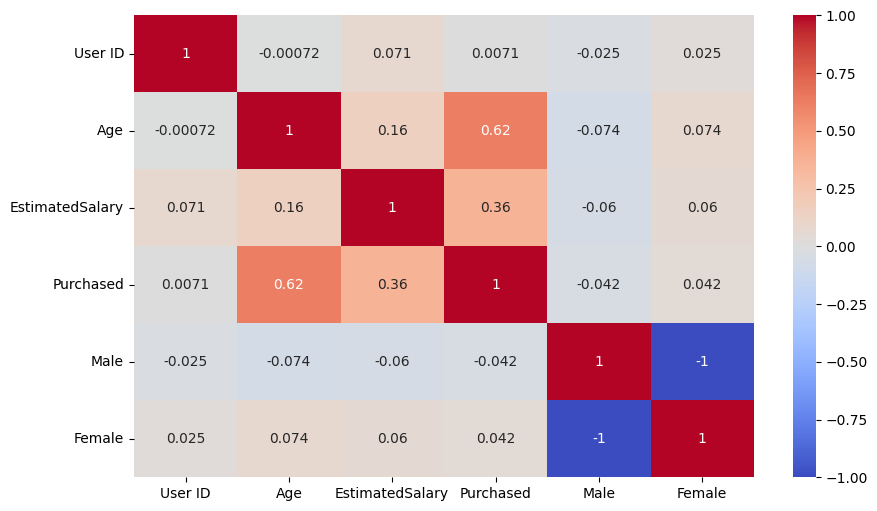

In [79]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True , cmap = 'coolwarm')

We see that :

> Age and Purchased has strong positive correlation & EstmatedSalary and purchased has also the same.

In [80]:
df

,User ID,Age,EstimatedSalary,Purchased,Male,Female
0,15624510,19,19000,0,True,False
1,15810944,35,20000,0,True,False
2,15668575,26,43000,0,False,True
3,15603246,27,57000,0,False,True
4,15804002,19,76000,0,True,False
...,...,...,...,...,...,...
395,15691863,46,41000,1,False,True
396,15706071,51,23000,1,True,False
397,15654296,50,20000,1,False,True
398,15755018,36,33000,0,True,False


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , ConfusionMatrixDisplay

x = df[['Age', 'EstimatedSalary']]
y = df[['Purchased']]

X_train , X_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

model = LogisticRegression()
model.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [89]:
y_pred = model.predict(X_test)
X_test.shape

(80, 2)

In [83]:
accuracy = accuracy_score(y_test , y_pred)
confmatrix = confusion_matrix(y_test , y_pred)
classify = classification_report(y_test,y_pred)

In [84]:
print(f"Accuracy : {accuracy}\n")
print(f"Confusion Matrix : {confmatrix}\n")
print(f"classif.. report : {classify}\n")

Accuracy : 0.8875

Confusion Matrix : [[50  2]
 [ 7 21]]

classif.. report :               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80




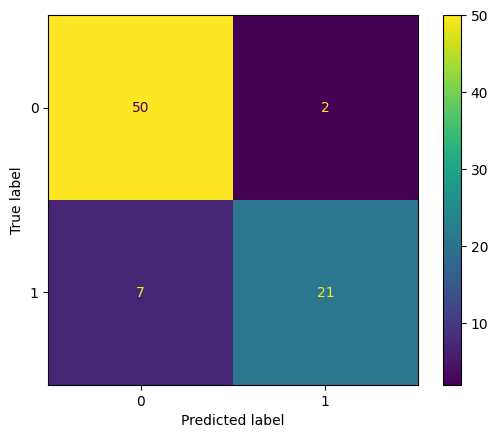

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix = confmatrix )
disp.plot()

In [94]:
print(model.predict([[12 , 65000]]))


[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
